<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# Model evaluation - Recall Case

<a id = section1></a>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  - **1.1** [**Need for Model Evaluation.**](#Section11)
  - **1.2** [**What is Recall Score?**](#Section12)
  - **1.3** [**Concept Behind Recall Score**](#Section13)

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Statistics**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)

**6.** [**Data Preparation**](#Section6)<br>

**7.** [**Model Development and Evaluation.**](#Section7)<br>
  - **7.1** [**RandomForest Baseline Model**](#Section71)<br>
  - **7.2** [**Using Trained Model for Prediction**](#Section72)<br>
  - **7.3** [**Random Forest Baseline Model Evaluation**](#Section73)<br>
  - **7.4** [**Random Forest with RandomizedSearchCV**](#Section74)<br>
  - **7.5** [**Random Forest with RandomSearchCV Model Evaluation**](#Section75)<br>
  
**8.** [**Conclusion**](#Section8)<br>



---
<a name = Section1></a>
# **1. Introduction**
---

- **Model Evaluation** is an **integral part of the model development process**.

- It **helps to find** **the best model that represents our data** and how well the chosen model will work in the future. 

- **Evaluating model performance** with the data used for **training should not be used** in data science because the model has already learned the features passed for training and when evaluated on the same data it will pass overfitted result.

<a name = Section11></a>
### **1.1 Need for Model Evaluation.**

- Model Evaluation **plays an important role** in the whole process.

- The performance of a model is **calculated by choosing the right metrics**.

- The **right metrics** are generally **specific to the use case**.

- It also helps us choose the right model.

<a name = Section12></a>
### **1.2 What is Recall Score?**

- Recall is the **proportion of actual positive** cases which are **correctly identified**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/recall.jpg" width="480" height="100" /></center></br>

- The precise definition of recall is the **number of true positives divided by the number of true positives plus the number of false negatives**.

<a name = Section13></a>
### **1.3 Concept Behind Recall Score**

- As we know, Recall gives us **proportion of actual positive** cases which are **correctly identified**.

- Let us understand it with the **confusion matrix**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/confusion%20total%20matrix.png" width="480" height="240" /></center>

- In the above diagram,
 
  - **True Positives (TP) -**
 
    - These are the **correctly predicted positive values** which means that the value of **actual class is yes** and the value of **predicted class is also yes**.
  
  - **True Negatives (TN) -** 
  
     - These are the **correctly predicted negative values** which means that the value of **actual class is no** and value of **predicted class is also no**.

  - **False Positives (FP) –**
     - When **actual class is no** and **predicted class is yes**. 

  - **False Negatives (FN) –**
     - When **actual class is yes** but **predicted class in no**.  



---
<a name = Section1></a>
# **2. Problem Statement**
---

- Given the __credit card transaction__ dataset, make a model to predict transactions are fradulent or not using random forest algorithm. </br>



<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/credit%20card%20fraud.jpg" width="500" height="300" /></center>




- The datasets contains _transactions made by credit cards in September 2013 by european cardholders_.

- This dataset presents transactions that occurred in two days, where we have __38 frauds__ out of __10000 transactions__. 

- The dataset is _highly unbalanced_, the positive class (frauds) account for __0.0038%__ of all transactions.

- Evaluate the model using possible __model evaluation techniques__.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

     |████████████████████████████████| 71kB 3.0MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 266kB 4.4MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
     |████████████████████████████████| 604kB 13.1MB/s 
     |████████████████████████████████| 3.1MB 22.9MB/s 
     |████████████████████████████████| 296kB 32.2MB/s 


<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model
from sklearn.preprocessing import RobustScaler                      # to scale the data based on their inter-quartile range
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The data set is based on the **credit-card transactions** made in **September 2013** by **European cardholders**.

- This data set presents **transactions** that **occurred** in **two days** and can be retrieved from the attached <a href = "https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/credit_fraud.csv">**link**</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 100 | 31 | 3.42 MB| 


| Id | Features | Description |
| :-- | :--| :--| 
|01| **Time** | Seconds elapsed between each transaction and the first transaction in the dataset. Range:[0, 15012]|
|02| **V1...V28** | Encrypted information of the credit details.| 
|03|**Amount**|The transaction amount peformed by the credit holder. Range: [0, 7712.43]|
|04|**Class**|Label explaing fraudulent and non-fraudulent transactions. [0: Non-fraudulent, 1: Fraudulent]|

In [ ]:
fraud = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/credit_fraud.csv')
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,0.09079,-0.55160,-0.61780,-0.99139,-0.31117,1.46818,-0.47040,0.20797,0.02579,0.40399,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0
1,0,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,-0.16697,1.61273,1.06524,0.48910,-0.14377,0.63556,0.46392,-0.11480,-0.18336,-0.14578,-0.06908,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0
2,1,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,0.20764,0.62450,0.06608,0.71729,-0.16595,2.34586,-2.89008,1.10997,-0.12136,-2.26186,0.52498,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000,0
3,1,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,-0.05495,-0.22649,0.17823,0.50776,-0.28792,-0.63142,-1.05965,-0.68409,1.96578,-1.23262,-0.20804,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000,0
4,2,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,0.75307,-0.82284,0.53820,1.34585,-1.11967,0.17512,-0.45145,-0.23703,-0.03819,0.80349,0.40854,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000,0


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
print("Shape of our Data is :", fraud.shape)
print("Number of Rows are :",fraud.shape[0])
print("Number of Columns are :",fraud.shape[1])

Shape of our Data is : (10000, 31)
Number of Rows are : 10000
Number of Columns are : 31


In [ ]:
fraud.info(verbose = True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

**Observations:**

- There are **no null values present**.

- **Each feature** seems to have **correct data type**.

<a name = Section42></a>
### **4.2 Data Statistics**

- In this section we will get **descriptive statistics of the data** and see some observations.

In [ ]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,5966.03340,-0.24186,0.28195,0.90627,0.26415,-0.04640,0.13311,-0.07169,-0.06478,0.80222,-0.22300,0.76607,-1.27251,0.85141,0.70060,-0.12963,-0.00776,0.31899,-0.01607,-0.07042,0.02751,-0.05199,-0.15267,-0.03327,0.02133,0.08715,0.10814,0.00552,0.00291,63.03019,0.00380
std,4473.40374,1.52168,1.30814,1.15915,1.44123,1.18294,1.30731,1.07743,1.25906,1.15520,1.09355,1.16860,1.52766,1.21305,1.23929,0.97557,0.88206,0.96639,0.79426,0.80837,0.58999,0.91381,0.63108,0.48781,0.59443,0.42817,0.56279,0.41087,0.26625,184.48616,0.06153
min,0.00000,-27.67057,-34.60765,-15.49622,-4.65755,-32.09213,-23.49671,-26.54814,-23.63250,-6.32980,-13.19342,-2.59533,-17.76914,-3.38951,-19.21433,-4.15253,-12.22719,-18.58737,-6.92076,-4.93273,-13.27603,-11.46843,-8.52714,-15.14434,-2.51238,-2.57736,-1.33856,-7.97610,-3.50925,0.00000,0.00000
25%,2072.75000,-1.01328,-0.20834,0.41280,-0.61442,-0.64339,-0.62993,-0.54234,-0.19075,0.07087,-0.68842,-0.06369,-2.36811,-0.01798,0.08040,-0.70953,-0.49554,-0.18003,-0.45030,-0.55213,-0.14998,-0.26812,-0.54964,-0.17412,-0.32782,-0.15814,-0.32797,-0.08449,-0.01575,5.00000,0.00000
50%,4563.50000,-0.37280,0.28852,0.94436,0.21986,-0.15277,-0.15257,-0.05559,0.01287,0.80528,-0.34072,0.74675,-1.62101,0.91913,0.89979,-0.01008,0.06609,0.29742,0.02522,-0.07721,-0.02142,-0.12327,-0.13675,-0.04579,0.07998,0.12100,0.04286,-0.00457,0.01590,15.95000,0.00000
75%,10233.25000,1.15086,0.90188,1.60290,1.12567,0.37108,0.50536,0.47628,0.27453,1.50630,0.17430,1.57654,0.08267,1.76889,1.49921,0.53350,0.54740,0.78286,0.45939,0.44291,0.15653,0.03271,0.24749,0.08167,0.41088,0.35906,0.47639,0.12081,0.07718,50.96000,0.00000
max,15012.00000,1.96050,8.63621,4.10172,10.46302,34.09931,21.39307,34.30318,5.06038,10.39289,12.25995,12.01891,3.77484,4.46541,5.74873,3.63504,4.08780,7.89339,4.11556,4.55536,8.01257,22.58899,4.53445,13.87622,3.20020,5.52509,3.51735,8.25438,4.86077,7712.43000,1.00000


**Observation:**

- The **average** value of **1000 transactions** are **5966 seconds**.

- **25%** of **transactions** happened **<= 2072 seconds** while **50% and 75%** of **transactions** happened **<= 4563 seconds** and **<= 10233 seconds**.

- The **average amount** of **transaction** performed by credit card holder is **$\$$ 63**.

- **25%** of **transactions extracted $\$$ 5** while **50% and 75%** of **transactions extracted $\$$ 15.9** and **$\$$ 50**.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
profile = ProfileReport(df = fraud)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

In [ ]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**

- Report show that there are **31 features** out of which **30 are numerical** and **one is boolean**.

- There is **no missing data**.

- There **exists 42 duplicate rows** (0.4%).

- For full details checkout the report.

<a name = Section6></a>

---
# **6. Data Preparation**
---

**Scaling the data**

- We will use **RobustScalar** to **scale *'amount'* and *'time'* features** of our data.

- __RobustScalar__ is similar to normalization but it instead **uses the interquartile range, so that it is robust to outliers**.

- Please refer to the link of RobustScalar - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

fraud['scaled_amount'] = rob_scaler.fit_transform(fraud['Amount'].values.reshape(-1,1))
fraud['scaled_time'] = rob_scaler.fit_transform(fraud['Time'].values.reshape(-1,1))

fraud.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = fraud['scaled_amount']
scaled_time = fraud['scaled_time']

fraud.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
fraud.insert(0, 'scaled_amount', scaled_amount)
fraud.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

fraud.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.90840,-0.55922,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,0.09079,-0.55160,-0.61780,-0.99139,-0.31117,1.46818,-0.47040,0.20797,0.02579,0.40399,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,0
1,-0.28851,-0.55922,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,-0.16697,1.61273,1.06524,0.48910,-0.14377,0.63556,0.46392,-0.11480,-0.18336,-0.14578,-0.06908,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,0
2,7.89186,-0.55910,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,0.20764,0.62450,0.06608,0.71729,-0.16595,2.34586,-2.89008,1.10997,-0.12136,-2.26186,0.52498,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,0
3,2.34008,-0.55910,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,-0.05495,-0.22649,0.17823,0.50776,-0.28792,-0.63142,-1.05965,-0.68409,1.96578,-1.23262,-0.20804,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,0
4,1.17581,-0.55897,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,0.75307,-0.82284,0.53820,1.34585,-1.11967,0.17512,-0.45145,-0.23703,-0.03819,0.80349,0.40854,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,0


**Preparing x and y using pandas**

In [ ]:
x = fraud.drop('Class',axis = 1)
x.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,2.90840,-0.55922,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,0.09079,-0.55160,-0.61780,-0.99139,-0.31117,1.46818,-0.47040,0.20797,0.02579,0.40399,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105
1,-0.28851,-0.55922,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,-0.16697,1.61273,1.06524,0.48910,-0.14377,0.63556,0.46392,-0.11480,-0.18336,-0.14578,-0.06908,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472
2,7.89186,-0.55910,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,0.20764,0.62450,0.06608,0.71729,-0.16595,2.34586,-2.89008,1.10997,-0.12136,-2.26186,0.52498,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975
3,2.34008,-0.55910,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,-0.05495,-0.22649,0.17823,0.50776,-0.28792,-0.63142,-1.05965,-0.68409,1.96578,-1.23262,-0.20804,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146
4,1.17581,-0.55897,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,0.75307,-0.82284,0.53820,1.34585,-1.11967,0.17512,-0.45145,-0.23703,-0.03819,0.80349,0.40854,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515


In [ ]:
y = fraud['Class']

**Spliting X and y into train and test dataset.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

**Checking the shape of X and y of train dataset**

In [ ]:
print(X_train.shape)
print(y_train.shape)

(7500, 30)
(7500,)


**Checking the shape of X and y of test dataset**

In [ ]:
print(X_test.shape)
print(y_test.shape)

(2500, 30)
(2500,)


<a name = Section7></a>

---
# **7. Model Development & Evaluation**
---

- In this section we will **develop RandomForest using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Recall score**, also we will check for **Accuracy**, **Precision**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Curve**.



<a name = Section71></a>

## **7.1 Random Forest - Baseline Model**

In [ ]:
model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<a name = Section72></a>

## **7.2 Using Trained Model for Prediction**

In [ ]:
#predicting on test data
y_pred_test = model.predict(X_test)

<a name = Section73></a>

## **7.3 Random Forest Baseline Model Evaluation**

### Checking Accuracy

In [ ]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9992


### Checking Precision Score

In [ ]:
precision_score(y_test,y_pred_test)

1.0

### Checking Recall Score

In [ ]:
recall_score(y_test,y_pred_test)

0.7142857142857143

### Checking F1-Score

- The F measure (F1 score or F score) is a **measure of a test’s accuracy** and is defined as **the weighted harmonic mean of the precision and recall of the test**.
- The F score can **provide a more realistic measure of a test’s performance** by **using both precision and recall**. 
- The F score is often **used in information retrieval** for measuring search, **document classification**, and **query classification performance**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/f1.jpg" width="300" height="240" /></center>


In [ ]:
f1_score(y_test,y_pred_test)

0.8333333333333333

### Checking ROC-AUC Curve and Precision-Recall Curve

- ROC curve should not be used for **imbalanced data** as that can **interpret wrong result**. *If the model is performing good on the imbalanced data we should use precision-recall curve*.

- Because the **False Positive Rate ( False Positives / False Positives + True Negatives )** does **not drop drastically when the Total Real Negatives is huge**. 

- Whereas **Precision ( True Positives / (True Positives + False Positives) )** is **highly sensitive to False Positives and is not impacted by a large total real negative**.

Text(0.5, 0, 'Recall')

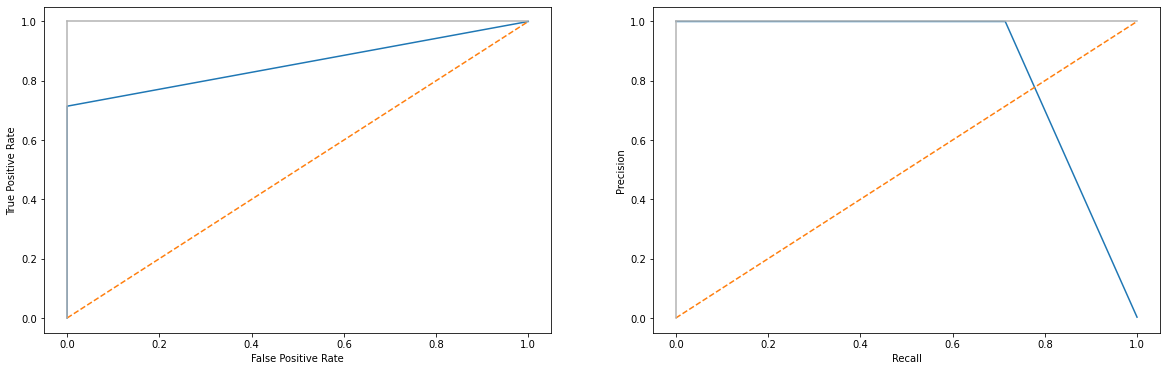

In [ ]:
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

**Observation:**

- We can **observe** a slight difference between **ROC-AUC CURVE** and **Precision-Recall Curve**.

<a name = Section74></a>

## **7.4 Random Forest with RandomizedSearchCV**


Applying __RandomizedsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.<br/>
To know more about the different parameters in random forest classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- n_estimators
- min_samples_split
- min_samples_leaf

You can change other parameters also and compare the impact of it via calculating __accuracy score & confusion matrix__

In [ ]:
# parameters for RandomearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": [2,4,5],
              "min_samples_split": [2,4,7,9],
              "min_samples_leaf": [3,5,7,11],
              "bootstrap": [True, False],
              "n_estimators": [12,90,100,300,700],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
y_pred_test1 = random_search.predict(X_test)

<a name = Section75></a>

## **7.5 Random Forest with RandomSearchCV Model Evaluation**

### Checking Accuracy

In [ ]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.998


### Checking Precision Score

In [ ]:
precision_score(y_test,y_pred_test1)

0.6

### Checking Recall Score

In [ ]:
recall_score(y_test,y_pred_test1)

0.8571428571428571

### Checking F1-Score


In [ ]:
f1_score(y_test,y_pred_test1)

0.7058823529411764

### Checking ROC-AUC Curve and Precision-Recall Curve

Text(0.5, 0, 'Recall')

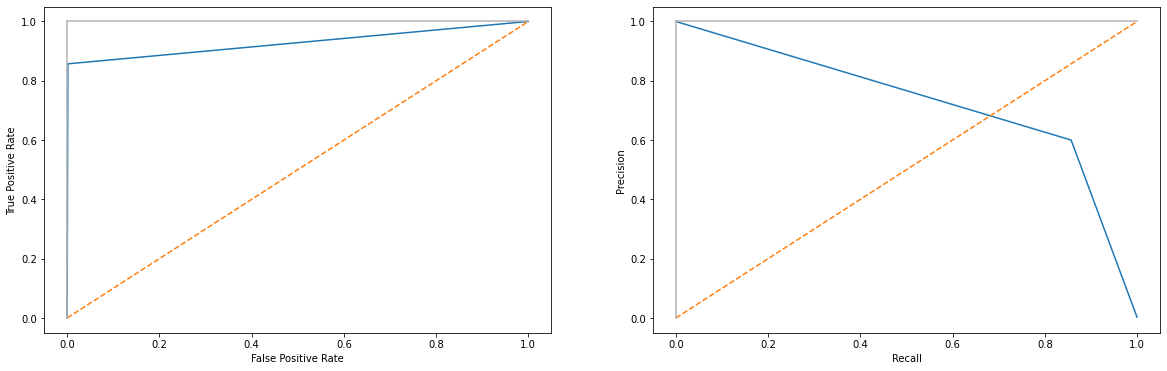

In [ ]:
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_pred_test1)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test1)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

<a name = Section7></a>

---
# **7. Choosing Better Model Based on Prediction**
---

In [ ]:
recall_dict = {'Baseline Model':recall_score(y_test, y_pred_test),
                  'Tuned Model':recall_score(y_test, y_pred_test1)}

In [ ]:
recall = pd.DataFrame(recall_dict, index=['Scores'])

In [ ]:
recall

,Baseline Model,Tuned Model
Scores,0.71429,0.85714


- We have **compared the performance** of the two models using **various model evaluation techinques**.

- Our **objective is to minimize False Positive** so that no innocent is convicted as guilty. Therefore, **among recall & precision scores, we will give more importance to precision score**.
  
  - **Recall score for model1 is: 0.71**

  - **Recall score for model2 is: 0.85**

* As **Recall score of Tuned Model is greater** than that of Baseline Model, therefore, **Tuned Model** is preferable.

<a name = Section8></a>

---
# **8. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model training**.

- We **observed metrics for our prediction**.

- This **model** now can **help us** in **identifying** the criminal.